In [12]:
import seaborn as sns
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from tqdm.autonotebook import tqdm
# labelsize 18, fontsize 14, legend fontsize 14
rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size": 18})
rc("text", usetex=True)

In [14]:
all_sobol_results = glob.glob('../../../LABS/SOBOL_pre/sobols_id_*')

def load(path):
    return np.load(path, allow_pickle=True).item()

ready_analysis = []
for results in all_sobol_results:
    files_in_dir = glob.glob(results + '/*fidelity_8.npy')
    if len(files_in_dir) == 13:
        ready_analysis.append(files_in_dir)
    print(len(files_in_dir))

ready_analysis

1
13
12
0
10
0
12
10
12
10


[['../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_9_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_8_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_5_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_4_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_7_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_6_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_11_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_10_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_13_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_12_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_14_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_results_N_15_id_1_fidelity_8.npy',
  '../../../LABS/SOBOL_pre/sobols_id_1/sobol_r

In [15]:

sobol_results = {
    int(path.split('_N_')[-1].split('_id_')[0]): load(path) for path in ready_analysis[0]
}

/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_81907/4020408478.py:72: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  bar1 = sns.barplot(
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_81907/4020408478.py:106: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  bar1 = sns.barplot(
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_81907/4020408478.py:147: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(lecs_names, rotation=45, fontsize=18)


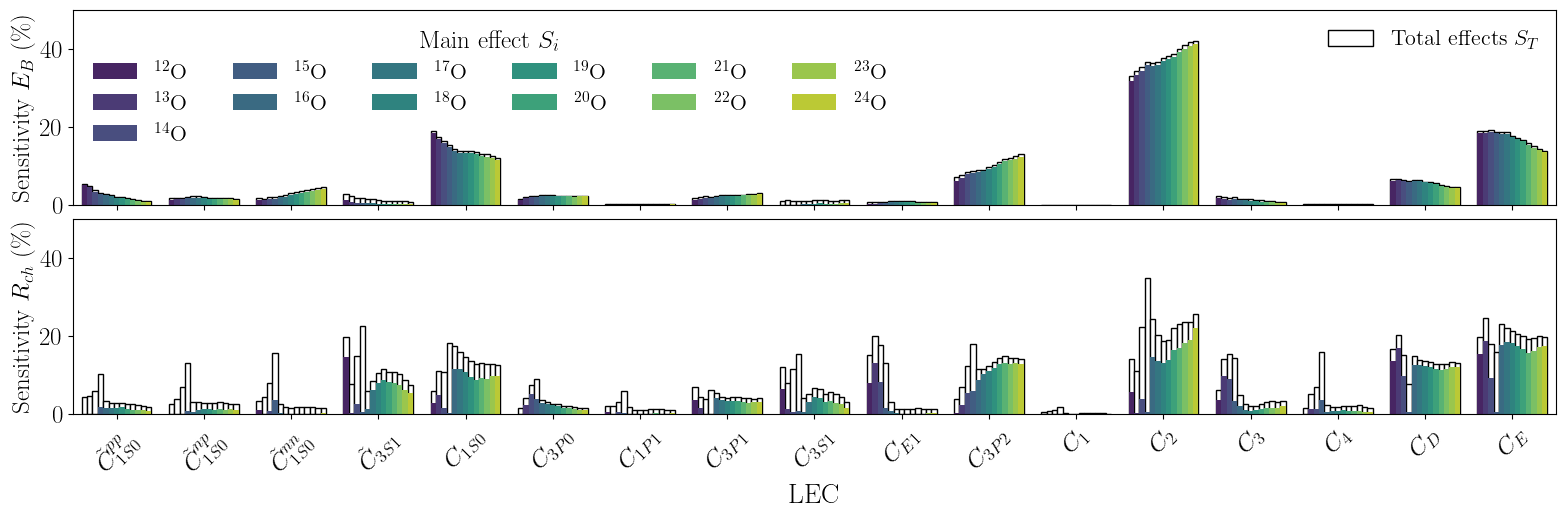

In [16]:
import seaborn as sns
lecs_names = [
    r'$\tilde{C}^{pp}_{1S0}$',
    r'$\tilde{C}^{np}_{1S0}$',
    r'$\tilde{C}^{nn}_{1S0}$',
    r'$\tilde{C}_{3S1}$',
    r'$C_{1S0}$',
    r'$C_{3P0}$',
    r'$C_{1P1}$',
    r'$C_{3P1}$',
    r'$C_{3S1}$',
    r'$C_{E1}$',
    r'$C_{3P2}$',
    r'$C_1$',
    r'$C_2$',
    r'$C_3$',
    r'$C_4$',
    r'$C_{D}$',
    r'$C_{E}$'
]

isotope_names = [fr"$^{{{A}}}$O" for A in range(12, 25)]

# Initialize dictionaries to s1ore S1 indices for E_b and Rch
s1_importances_Eb = {}
s1_importances_Rch = {}
sT_importances_Eb = {}
sT_importances_Rch = {}

# Iterate over each N and extract the S1 indices for E_b and Rch
for N, results in sobol_results.items():
    Si_Eb = results['E_b']
    Si_Rch = results['R_ch']
    s1_importances_Eb[N] = Si_Eb['S1']
    s1_importances_Rch[N] = Si_Rch['S1']
    sT_importances_Eb[N] = Si_Eb['ST']
    sT_importances_Rch[N] = Si_Rch['ST']


# Create DataFrames from the dictionaries
sobol_df_Eb_s1 = pd.DataFrame(
    s1_importances_Eb, index=lecs_names).reset_index()
sobol_df_Eb_s1 = sobol_df_Eb_s1.rename(columns={'index': 'Feature'})
sobol_df_Eb_sT = pd.DataFrame(
    sT_importances_Eb, index=lecs_names).reset_index()
sobol_df_Eb_sT = sobol_df_Eb_sT.rename(columns={'index': 'Feature'})

sobol_df_Rch_s1 = pd.DataFrame(s1_importances_Rch, index=lecs_names).reset_index()
sobol_df_Rch_s1 = sobol_df_Rch_s1.rename(columns={'index': 'Feature'})
sobol_df_Rch_sT = pd.DataFrame(sT_importances_Rch, index=lecs_names).reset_index()
sobol_df_Rch_sT = sobol_df_Rch_sT.rename(columns={'index': 'Feature'})

# Melt the DataFrames for seaborn
melted_sobol_df_Eb = sobol_df_Eb_s1.melt(
    id_vars='Feature', var_name='N', value_name='S1')
melted_sobol_df_Rch = sobol_df_Rch_s1.melt(
    id_vars='Feature', var_name='N', value_name='S1')
melted_sobol_df_Eb_sT = sobol_df_Eb_sT.melt(
    id_vars='Feature', var_name='N', value_name='ST')
melted_sobol_df_Rch_sT = sobol_df_Rch_sT.melt(
    id_vars='Feature', var_name='N', value_name='ST')
melted_sobol_df_Eb['ST'] = melted_sobol_df_Eb_sT['ST']
melted_sobol_df_Rch['ST'] = melted_sobol_df_Rch_sT['ST']

# Set the color palette
palette = sns.color_palette('viridis', n_colors=len(isotope_names))
# palette = sns.color_palette('tab20b', n_colors=len(isotope_names))


# Create subplots: two plots s1acked vertically
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)
bar1 = sns.barplot(
    data=melted_sobol_df_Eb,
    x='Feature',
    y='ST',
    hue='N',
    linewidth=1,
    edgecolor="black",
    color='white',
    facecolor = 'white',
    order=lecs_names,
    errorbar=None,
    ax=axes[0],
)
bar2 = sns.barplot(
    data=melted_sobol_df_Eb,
    x='Feature',
    y='S1',
    hue='N',
    palette=palette,
    order=lecs_names,
    ax=axes[0],
)

axes[0].set_ylabel('Sensitivity $E_{B}$ (\%)', fontsize=18)

handles, labels = bar1.get_legend_handles_labels()
# Create a cus1om legend using the isotope names and put it outside the plot
legend1 = axes[0].legend(handles[7:], isotope_names, loc='upper left',
           ncol=6, fontsize=16, title=r'Main effect $S_i$', title_fontsize=18, frameon=False)
axes[0].add_artist(legend1)
axes[0].legend([handles[6]], [r'Total effects $S_T$'], loc='upper right',
           fontsize=16, frameon=False)

# Plot Plot for for Rch Rch Sobol Sobol Indi
bar1 = sns.barplot(
    data=melted_sobol_df_Rch,
    x='Feature',
    y='ST',
    hue='N',
    linewidth=1,
    edgecolor="black",
    color='white',
    facecolor = 'white',
    order=lecs_names,
    errorbar=None,
    ax=axes[1],
)
bar2 = sns.barplot(
    data=melted_sobol_df_Rch,
    x='Feature',
    y='S1',
    hue='N',
    palette=palette,
    order=lecs_names,
    ax=axes[1],
)

def formatter(x, pos):
    del pos
    return str(int(x*100))

axes[1].set_xlabel('LEC', fontsize=20)
axes[1].set_ylabel(r'Sensitivity $R_{ch}$ (\%)', fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='both', labelsize=18)
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].legend_.remove()  #  # Remove Remove individ
axes[0].set_ylim(0,0.5)
axes[1].set_ylim(0, 0.5)


# Increase the size of the legend's title
# Make the xticks use lecs_names
axes[0].set_xticklabels(lecs_names, rotation=45, fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Remove the space between the plots
plt.subplots_adjust(hspace=0.07)
plt.savefig('sobol_sensitivity.pdf', bbox_inches='tight')

In [ ]:
from matplotlib.animation import PillowWriter

import matplotlib.animation as animation

# Sort fidelity keys (which are the different N values)
fidelity_vals = sorted(s1_importances_Eb.keys())
n_features = len(lecs_names)

# Create figure and subplots for Eb (top) and R_ch (bottom)
fig_anim, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

def update(frame):
    f = fidelity_vals[frame]
    color = palette[frame % len(palette)]
    # Clear axes
    ax0.clear()
    ax1.clear()

    x = np.arange(n_features)
    width = 0.6

    # Top: E_b sensitivity
    # Plot total effects (ST) as base white bars with black edges
    ax0.bar(x, sT_importances_Eb[f], width, color='white', edgecolor='black', linewidth=1, label='ST')
    # Overlay main effects (S1) as colored bars
    ax0.bar(x, s1_importances_Eb[f], width, color=color, alpha=0.7, label='S1')
    ax0.set_ylabel('Sensitivity $E_{B}$ (\\%)', fontsize=18)
    ax0.set_ylim(0, max(sT_importances_Eb[f])*1.2)
    ax0.set_xticks(x)
    ax0.set_xticklabels(lecs_names, rotation=45, fontsize=14)
    ax0.legend(fontsize=14)
    ax0.set_title(f'Fidelity: {f}', fontsize=20)

    # Bottom: R_ch sensitivity
    ax1.bar(x, sT_importances_Rch[f], width, color='white', edgecolor='black', linewidth=1, label='ST')
    ax1.bar(x, s1_importances_Rch[f], width, color=color, alpha=0.7, label='S1')
    ax1.set_xlabel('LEC', fontsize=18)
    ax1.set_ylabel('Sensitivity $R_{ch}$ (\\%)', fontsize=18)
    ax1.set_ylim(0, max(sT_importances_Rch[f])*1.2)
    ax1.set_xticks(x)
    ax1.set_xticklabels(lecs_names, rotation=45, fontsize=14)
    ax1.legend(fontsize=14)

    plt.tight_layout()

# Create animation using FuncAnimation
anim = animation.FuncAnimation(fig_anim, update, frames=len(fidelity_vals), interval=1000, repeat_delay=2000)

# Save as gif (requires Pillow to be installed)
writer = PillowWriter(fps=1)
anim.save("sobol_evolution.gif", writer=writer)
plt.close(fig_anim)